In [1]:
#import necessary libraries
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
# Load the pre-trained HRNet model for keypoint detection
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [8]:
def annotate_and_display(image_path, threshold=0.2):
    """
    Load an image, perform keypoint detection, annotate the image with keypoints, and display it.

    Args:
        image_path (str): The path to the input image file.
        threshold (float): The confidence threshold for keypoints to be displayed.

    Returns:
        None
    """
    
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([transforms.ToTensor()])
    input_image = transform(image).unsqueeze(0)

    # Make predictions using the pre-trained model
    with torch.no_grad():
        prediction = model(input_image)

    # Get the keypoints from the prediction
    keypoints_list = prediction[0]['keypoints']

    # Convert the annotated image to numpy array
    annotated_image = transforms.ToPILImage()(input_image.squeeze(0))

    # Plot the original image with keypoints
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(annotated_image)
    for keypoints in keypoints_list:
        for kp in keypoints:
            x, y, score = int(kp[0]), int(kp[1]), kp[2]
            if score > threshold:
                plt.scatter(x, y, color='red', s=10)
    plt.title("Annotated Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

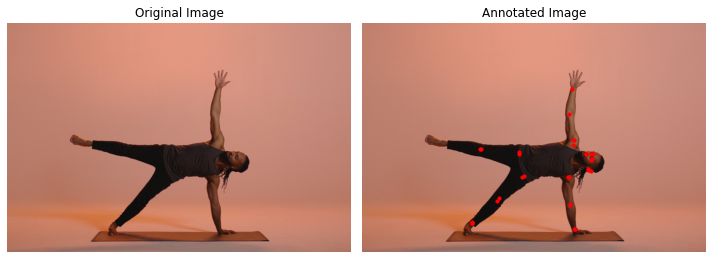


 ****************************************************************************************************


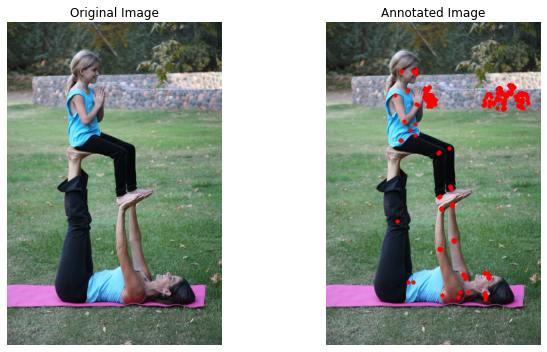


 ****************************************************************************************************


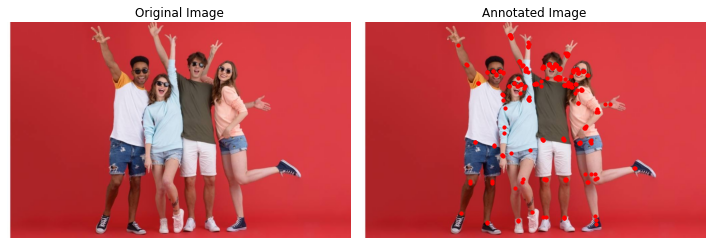


 ****************************************************************************************************


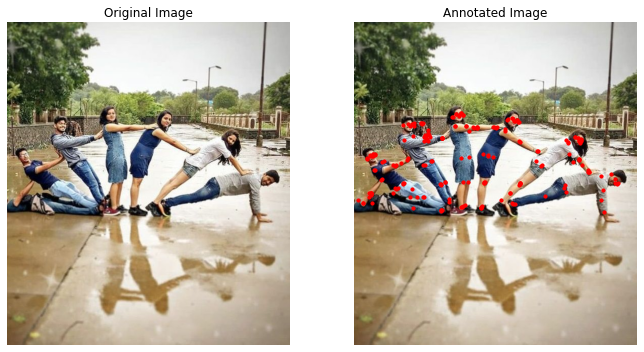


 ****************************************************************************************************


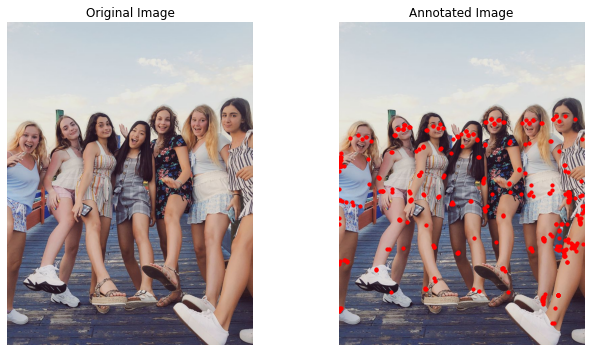


 ****************************************************************************************************


In [10]:
# Path to the directory containing images
image_dir = r'C:\Users\HP\Desktop\Pose estimation\test images'

# Get a list of image filenames in the directory
image_filenames = [filename for filename in os.listdir(image_dir) if filename.endswith('.jpg')]

# Iterate through each image
for image_filename in image_filenames:
    image_path = os.path.join(image_dir, image_filename)
    annotate_and_display(image_path, threshold=0.8)
    print("\n", "*"*100)